In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#Importing Data Frame
df=pd.read_csv(r"C:\Users\HP\Documents\OASIS\CarPrice.csv",na_values="-1")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,NaN,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,NaN,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,NaN,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,NaN,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
#Checking first 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Checking Last 5 rows
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,NaN,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,NaN,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,NaN,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,NaN,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,NaN,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1        3.0        alfa-romero giulia      gas        std   
1         2        3.0       alfa-romero stelvio      gas        std   
2         3        1.0  alfa-romero Quadrifoglio      gas        std   
3         4        2.0               audi 100 ls      gas        std   
4         5        2.0                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201        NaN           volvo 145e (sw)      gas        std   
201     202        NaN               volvo 144ea      gas      turbo   
202     203        NaN               volvo 244dl      gas        std   
203     204        NaN                 volvo 246   diesel      turbo   
204     205        NaN               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [8]:
#Checking for null values
df.isnull().sum()

car_ID               0
symboling           22
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,183.0,1.054645,1.132569,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [11]:
df['symboling'].isnull().sum()

22

In [12]:
#filling null values
df['symboling'].fillna(df['symboling'].mean(),inplace=True)

In [13]:
df['symboling'].isnull().sum()

0

In [14]:
#Checking Correlation
correlation=df.corr()
correlation

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.000653,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.000653,1.000000,-0.367752,-0.230461,-0.095024,-0.445060,-0.103680,-0.026374,-0.048312,0.054707,-0.122800,0.153078,0.210877,-0.119169,-0.064341,0.012006
wheelbase,0.129729,-0.367752,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.230461,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.095024,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.445060,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.103680,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.026374,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.048312,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.054707,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

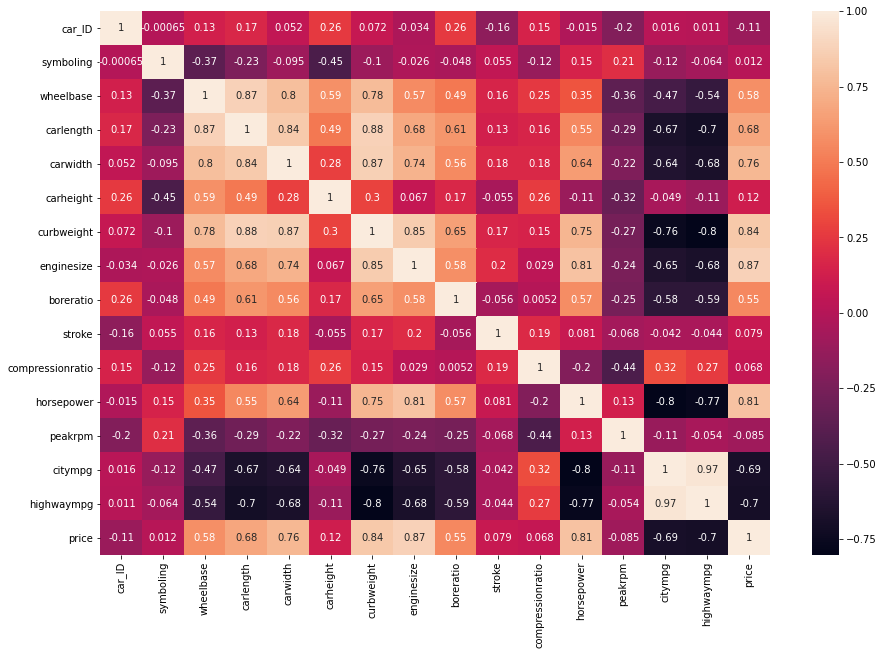

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Deleting Unnecessary Columns

In [17]:
df=df.drop(['car_ID','symboling','carheight','stroke','peakrpm'],axis=1)

In [18]:
df.dtypes

CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
compressionratio    float64
horsepower            int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Encoding

In [19]:
le = LabelEncoder()
df_cat = df.select_dtypes(include='object')
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [20]:
for i in df_cat.columns:
    df[i] = le.fit_transform(df[i])
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,0,2,130,5,3.47,9.0,111,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,0,2,130,5,3.47,9.0,111,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,3,152,5,2.68,9.0,154,19,26,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,3,2,109,5,3.19,10.0,102,24,30,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,3,1,136,5,3.19,8.0,115,18,22,17450.0


In [21]:
df.corr()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
CarName,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,-0.075349,...,-0.090381,0.047154,-0.153982,0.123845,0.188598,0.101730,-0.092131,0.093437,0.102895,-0.231439
fueltype,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,0.082695,0.110617,-0.069594,0.041529,-0.054451,-0.984356,0.163926,-0.255963,-0.191392,-0.105679
aspiration,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.295541,0.241685,-0.202362,-0.254416,0.177926
doornumber,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,...,0.062431,0.154322,-0.020742,0.015519,-0.119258,-0.177888,0.126947,0.012417,0.036330,-0.031835
carbody,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,0.136243,-0.153928,0.031697,-0.007170,-0.083976
drivewheel,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,-0.116823,0.223238,0.524307,0.424686,0.481827,0.127479,0.518686,-0.449581,-0.452220,0.577992
enginelocation,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.114127,0.135541,0.196826,0.105971,0.185042,-0.019762,0.317839,-0.153487,-0.102026,0.324973
wheelbase,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.249786,0.353294,-0.470414,-0.544082,0.577816
carlength,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.158414,0.552623,-0.670909,-0.704662,0.682920
carwidth,-0.075349,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,0.012298,-0.194074,0.735433,0.521434,0.559150,0.181129,0.640732,-0.642704,-0.677218,0.759325


<AxesSubplot:>

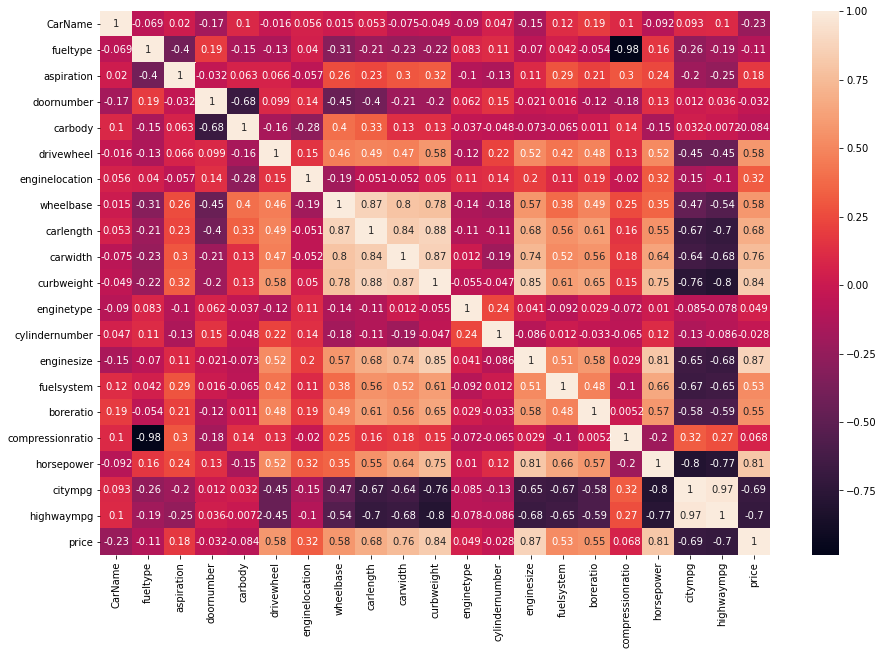

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

# Deleting Unnecessary Columns

In [24]:
df=df.drop(['doornumber','carbody','cylindernumber','compressionratio'],axis=1)

# Splitting data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['price'],axis=1),df["price"],test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 16)
(62, 16)
(143,)
(62,)


In [26]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

# Training

In [27]:
RFG = RandomForestRegressor()
RFG_model = RFG.fit(x_train,y_train)
y_pred_train = RFG_model.predict(x_train)
y_pred_test = RFG_model.predict(x_test)

In [28]:
y_pred_test

array([35028.775 , 19824.1   ,  9104.34  , 13318.98  , 29182.34  ,
        7111.29  ,  8110.915 ,  7989.28  , 10012.955 ,  8227.81  ,
       14782.575 ,  8031.07  , 15010.4875, 10943.84  , 41494.16  ,
        6243.23  ,  6048.965 , 14747.94  ,  8286.54  ,  9192.8   ,
       10528.77  , 15798.72  ,  7129.42  ,  6080.1   ,  7213.79  ,
       35050.175 , 10786.48  , 16614.21  ,  7128.54  , 16301.37  ,
       28820.32  ,  6589.05  ,  8327.09  , 19222.49  ,  8152.57  ,
       29041.19  , 10300.1975, 13352.2   ,  7449.36  , 14917.86  ,
        8360.33  , 10440.475 , 15711.9   ,  8007.    ,  7074.71  ,
        8673.36  ,  7018.12  ,  7600.26  , 16232.71  , 16420.07  ,
        7218.62  , 16744.18  ,  6848.175 , 10439.63  ,  7092.68  ,
       15680.0275, 10921.32  , 13352.2   , 31864.37  ,  6088.875 ,
       11339.11  , 18690.4   ])

In [29]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

# Checking Performance

In [30]:
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

(0.9883275500383432, 0.9367501050880166)

In [31]:
np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))

(843.4639035512575, 2093.3775737323085)

In [32]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [34]:
y_pred_test2 = RFG_model.predict([[13,1,0,2,0,103.5,189.0,66.9,3230,3,209,5,3.62,182,16,22]])
y_pred_test2

array([35028.775])

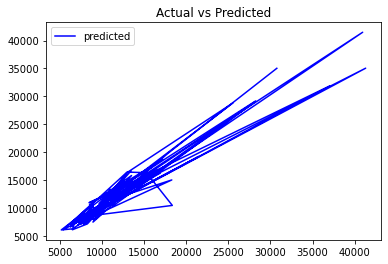

In [35]:
# Actual data vs predicted data
plt.plot(y_test,y_pred_test,color = 'blue',label = 'predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()